# Entegable 3 - Clustering y Selección de características

Francisco Javier Mercader Martínez

## Machine Learning. Grado en Ciencia de datos

Los siguientes ejercicios tienen que ser entregados dentro de las dos horas de prácticas. Cómo realizar el entregable:


-   La realización se debe de hacer de forma  **INDIVIDUAL**
-   Se debe de enviar un notebook con el código y las explicaciones, comentarios, análisis y justificaciones en Markdown.
-   Reproducibilidad:
    -   Se debe de establecer una variable semilla con un número al inicio, esta variables será la que se utilice para el np.random_seed y para el random_state.
    -   Las bases de datos se cargan con rutas relativas.
-   El notebook se debe de subir a la tarea del aula virtual creada antes de la finalización de la hora de clase. (Ver tarea y fecha de cierre)

### EJERCICIO 1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

In [2]:
random_seed = 1234

np.random.seed(random_seed)


1. Carga el dataset "Espezanda_de_vida.csv", ¿cuántas características tiene?. Realiza el resto de apartados a partir de este conjunto de datos.

In [5]:
esperanza_vida = pd.read_csv("Datos_Esperanza_Vida.csv", sep=',', index_col=0)
esperanza_vida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, Afghanistan to Zimbabwe
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Estimacion_Vida                 143 non-null    float64
 1   Mortalidad_Adulta               143 non-null    int64  
 2   Muertes_Infantil                143 non-null    int64  
 3   Hepatitis_B                     143 non-null    int64  
 4   Sarampion                       143 non-null    int64  
 5   _IMC                            143 non-null    float64
 6   _Muertes_Menores_5_Anyos        143 non-null    int64  
 7   Polio                           143 non-null    int64  
 8   Difteria_                       143 non-null    int64  
 9   VIH                             143 non-null    float64
 10  PIB                             143 non-null    float64
 11  _Delgadez_10_19_Anyos           143 non-null    float64
 12  _Delgadez_5_9_Anyos       

2. Analiza los datos y realiza las operaciones oportunas para que estén preparados para aplicar técnicas de clústering.

<Axes: >

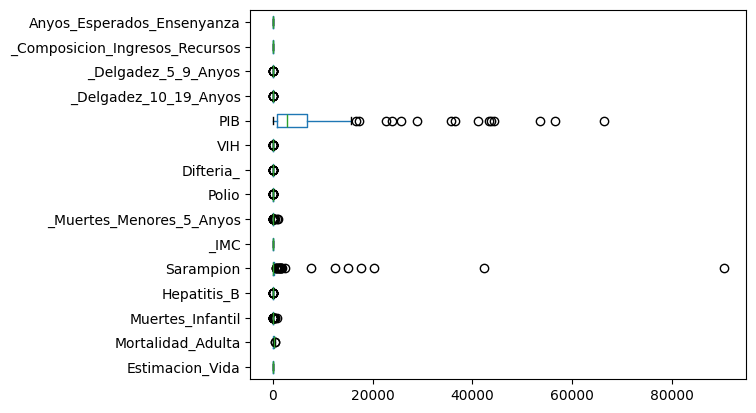

In [69]:
esperanza_vida.boxplot(grid=False, vert=False)

Como se puede apreciar es necesario transformar los datos para que estén en la misma escala y que así los podamos comparar

In [70]:
scaler = StandardScaler()
scaler.fit(esperanza_vida)
data_scaled = scaler.transform(esperanza_vida)

<Axes: >

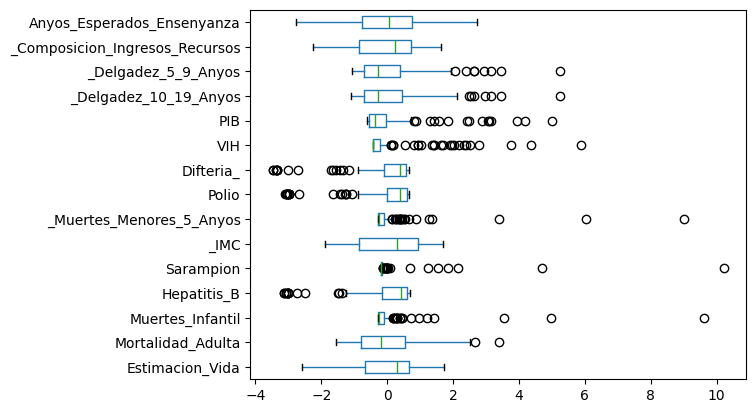

In [71]:
esperanza_vida_scaled = pd.DataFrame(data_scaled, columns=esperanza_vida.columns, index=esperanza_vida.index)
esperanza_vida_scaled.boxplot(grid=False, vert=False)

3. Aplica el clústering jerárquico con las dos librerías estudiadas y obtén las medidas de calidad pertinentes.

#### Clustering jerárquico con la librería **`Scipy`**

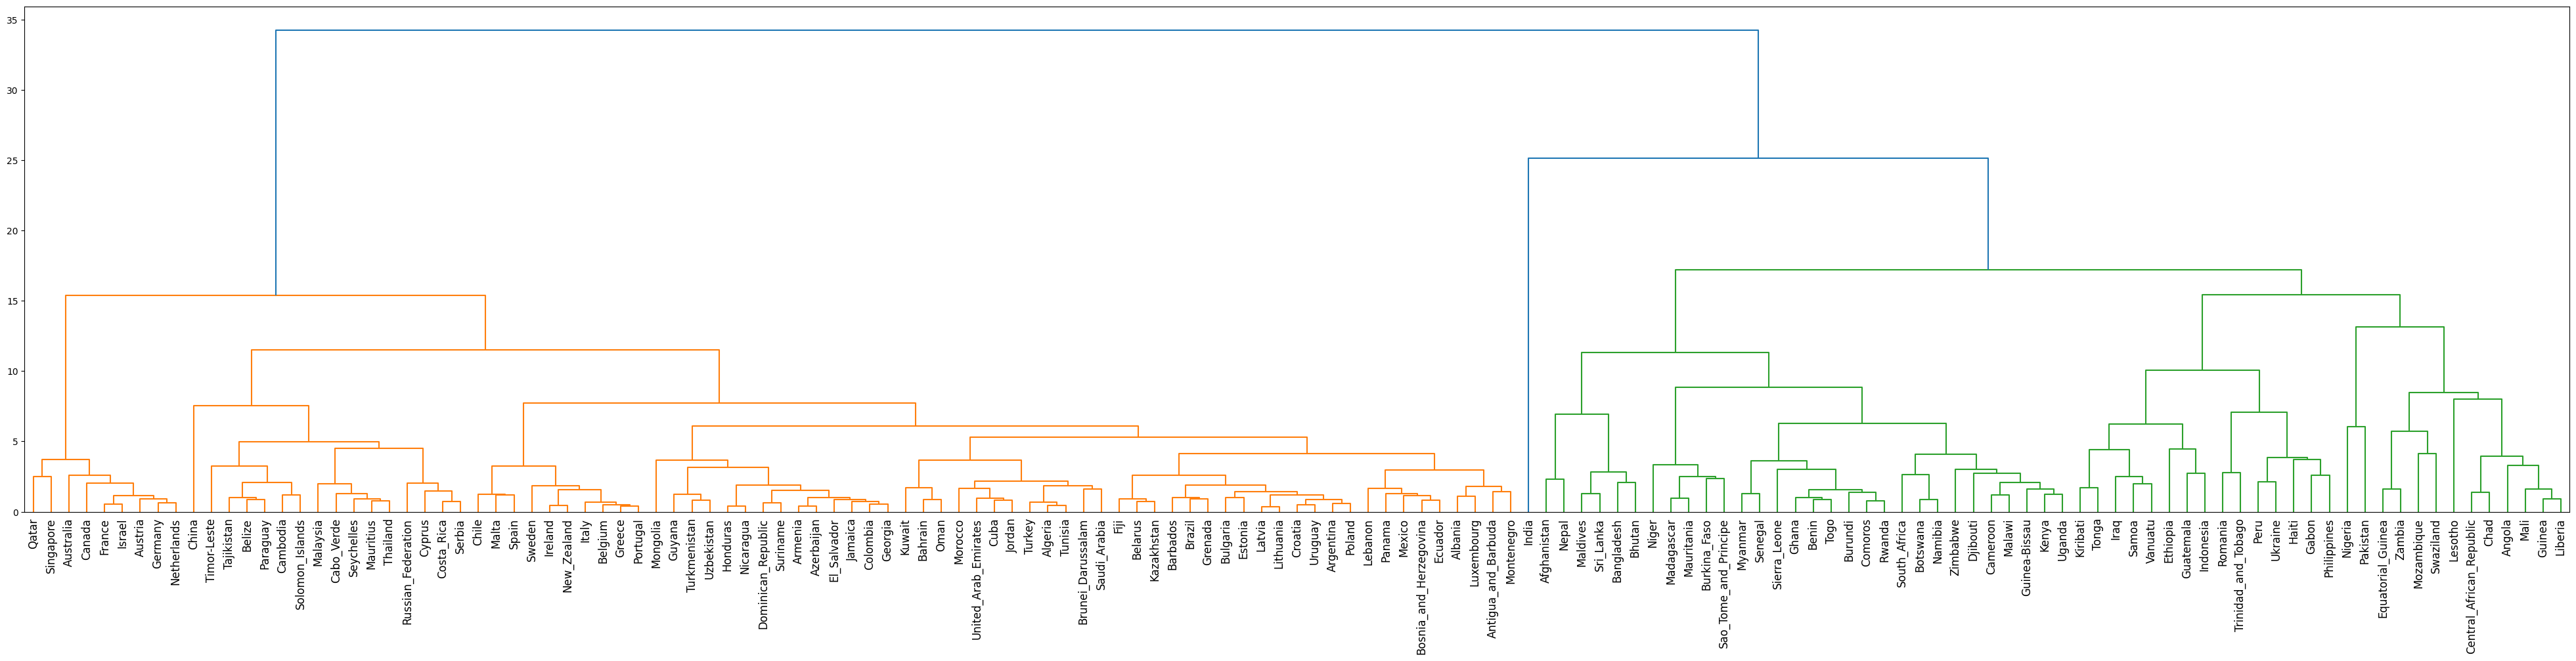

In [72]:
Hier_ward_scaled = hierarchy.linkage(esperanza_vida_scaled, method="ward")

fig = plt.figure(figsize=(50, 10))
dn = hierarchy.dendrogram(Hier_ward_scaled,labels=esperanza_vida_scaled.index,leaf_font_size=12)

Ahora que hemos agrupado los resultados dentro del dendograma y se puede apreciar la gran cantidad de clusters en lo que se divide vamos a probar cómo sería si lo agruparamos entre 5 y 10 clusters, ya que el número de datos es enorme.

In [73]:
clusters_ward = hierarchy.cut_tree(Hier_ward_scaled, n_clusters=[i for i in range(5, 11)])
clusters_ward

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 3, 3, 3, 3, 3],
       [1, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 4, 4, 4],
       [0, 0, 0, 0, 5, 5],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 5, 5],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 5, 5],
       [0, 0, 0, 0, 5, 5],
       [1, 1, 1, 4, 4, 4],
       [1, 1, 1, 4, 4, 4],
       [0, 0, 0, 0, 5, 5],
       [1, 3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 4, 4, 4],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 5, 5],
       [1, 1, 1, 4, 4, 4],
       [1, 1, 1, 1, 1, 1],
 

Como se puede apreciar se nos devuelve una array de $5\times n\_instancias$ en en el que cada columna indica cómo quedarían agrupados las instancias según el número de clusters indicados en `n_clusters`. Para realizar la misma operación pero cortando el dendograma a una determinada altura, habría que utilizar el parámetro `height`.

In [74]:
clusters_ward_height = hierarchy.cut_tree(Hier_ward_scaled,height=[10,10])
clusters_ward_height

array([[0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [3, 3],
       [3, 3],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [4, 4],
       [5, 5],
       [0, 0],
       [1, 1],
       [5, 5],
       [1, 1],
       [1, 1],
       [1, 1],
       [5, 5],
       [5, 5],
       [4, 4],
       [4, 4],
       [5, 5],
       [3, 3],
       [2, 2],
       [2, 2],
       [1, 1],
       [4, 4],
       [1, 1],
       [5, 5],
       [4, 4],
       [1, 1],
       [1, 1],
       [4, 4],
       [5, 5],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [6, 6],
       [1, 1],
       [3, 3],
       [7, 7],
       [1, 1],
       [3, 3],
       [5, 5],
       [1, 1],
       [1, 1],
       [6, 6],
       [2, 2],
       [5, 5],
       [1, 1],
       [7, 7],
       [1, 1],
       [8, 8],
       [6, 6],
       [6, 6],
       [1, 1],
       [3, 3],
       [1, 1],
       [1,

### Clustering jerárquico con la librería **`sklearn`**

Ahora utilizando la librería **`sklearn`** vamos a probar a realizar el clustering jerárquico agrupando los países en 5 clusters para ver el resultado

In [75]:
clusters_euclidean_ward = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters_fit = clusters_euclidean_ward.fit(esperanza_vida_scaled)

Ahora vamos a ver a qué cluster se ha asignado cada instancia:

In [76]:
clusters_fit.labels_

array([3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       0, 3, 3, 0, 0, 3, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1,
       0, 4, 0, 0, 4, 0, 0, 3, 0, 0, 4, 1, 3, 0, 4, 0, 2, 4, 4, 0, 0, 0,
       0, 0, 0, 3, 4, 0, 0, 0, 1, 1, 0, 0, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0,
       0, 0, 1, 3, 3, 3, 0, 0, 0, 3, 1, 0, 1, 0, 0, 4, 4, 0, 0, 0, 4, 0,
       3, 4, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 3, 4, 4,
       0, 0, 0, 3, 4, 0, 0, 0, 4, 1, 3], dtype=int64)

Ahora utilizar las funciones proporcionadas por el módulo **`sklearn.metrix`** para evaluar la calidad de la agrupación.

In [77]:
metrics.silhouette_samples(esperanza_vida_scaled,labels = clusters_ward[:,0])

array([ 0.08331866,  0.5563093 ,  0.45488982,  0.01863813,  0.5174174 ,
        0.53065782,  0.50046371,  0.31597448,  0.40891749,  0.47486748,
        0.47746491,  0.27797799,  0.56201428,  0.51722178,  0.53762665,
        0.14832573,  0.41869632,  0.27787178,  0.40803867,  0.08370348,
        0.54540275,  0.486187  ,  0.53435886,  0.31560539,  0.41717746,
        0.19763844,  0.00780785,  0.30723784,  0.30062898,  0.13262855,
        0.09941423,  0.52690393,  0.13150655,  0.49251834,  0.34968857,
        0.35585725,  0.56365667,  0.54146139,  0.39025306,  0.35491133,
        0.43015863,  0.37426121,  0.45292966,  0.06530073,  0.5293836 ,
       -0.13861855,  0.44601651,  0.43941641,  0.11209053,  0.54366836,
        0.41034186,  0.30185939,  0.51061458,  0.51572267,  0.0873101 ,
       -0.09668108,  0.39556328, -0.03391635,  0.1959308 ,  0.34945968,
        0.        ,  0.09177825,  0.11276172,  0.48482492,  0.4532292 ,
        0.49347876,  0.49759034,  0.47822104,  0.47588315,  0.40

4. Utiliza un procedimiento para determinar el número óptimo de clústers, devolviendo el valor de 'k' óptimo y la asignación de cluster resultante. Utiliza únicamente una de las dos librerías estudiadas y uno de los dos índices que miden la calidad.

Para determinar el número óptimo de clusters, es mejor usar el método del codo (Elbow Method) y la librería **`scipy`**. Para medir la calidad del clustering, puedes usar el coeficiente de silueta.

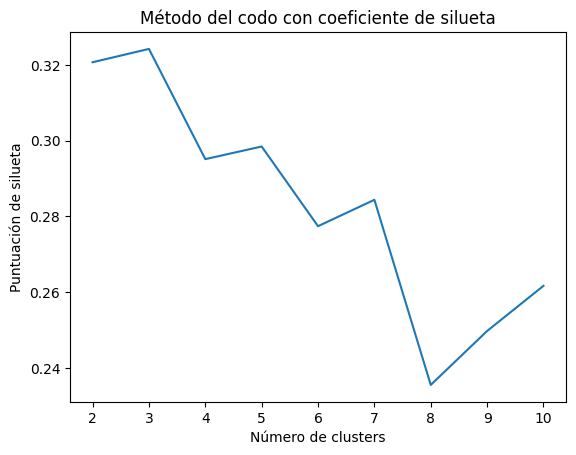

El número óptimo de clusters es 3


In [78]:
from scipy.spatial.distance import pdist

# Calcula la matriz de distancias
distancias = pdist(esperanza_vida_scaled, 'euclidean')

# Realiza el clustering jerárquico
clusters = hierarchy.linkage(distancias, method='ward')

# Calcula las distancias intra-cluster para diferentes números de clusters
silhouette_scores = []
for i in range(2, 11):
    etiquetas = hierarchy.fcluster(clusters, t=i, criterion='maxclust')
    silhouette_scores.append(metrics.silhouette_score(esperanza_vida_scaled, etiquetas))

# Grafica las puntuaciones de silueta
plt.plot(range(2, 11), silhouette_scores)
plt.title('Método del codo con coeficiente de silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de silueta')
plt.show()

# Encuentra el número óptimo de clusters
k_optimo = np.argmax(silhouette_scores) + 2  # +2 porque el rango comienza en 2

# Obtiene la asignación de cluster resultante
etiquetas_optimas = hierarchy.fcluster(clusters, t=k_optimo, criterion='maxclust')

print(f"El número óptimo de clusters es {k_optimo}")

5. Compara los resultados de los métodos del ejercicio 3 y justifica los cambios si los hay.

Repetimos las operaciones anteriores utilizando el número óptimo de clusters

In [79]:
clusters_euclidean_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_fit = clusters_euclidean_ward.fit(esperanza_vida_scaled)

clusters_ward = hierarchy.cut_tree(Hier_ward_scaled, n_clusters=3)

In [80]:
hierarchy.is_isomorphic(clusters_fit.labels_,clusters_ward[:, 0])

True

Se ha confirmado que el resultado es correcto

### EJERCICIO 2



In [81]:
# Data Processing
import pandas as pd
import numpy as np
import random

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, SelectPercentile
from sklearn.pipeline import Pipeline

import sklearn.datasets as dt

1. Carga el dataset "Toxicity2.csv" , ¿cuantas características e instancias tiene?. Realiza el resto de apartados a partir de este conjunto de datos.
Nota: La última columna es la columna utilizada para realizar la predicción.

In [82]:
tox = pd.read_csv("Toxicity2.csv", sep=";")

caracteristicas, instancias = tox.shape

print(f"'Toxicity2.csv' tiene {caracteristicas - 1} características y {instancias} instancias")

# Se ha restado una característica porque es la que corresponde a la última columna

'Toxicity2.csv' tiene 170 características y 312 instancias


2. Analiza los datos y realiza las operaciones oportunas para que estén preparados para aplicar técnicas de selección de características.

In [83]:
tox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 312 entries, MATS7c to Class
dtypes: float64(263), int64(48), object(1)
memory usage: 416.9+ KB


Lo más importante para preparar estos datos, ya que no tienen valores nulos, es codificar las variables categóricas (`Class`)

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for columna in tox.columns:
    if tox[columna].dtype == "object":
        tox[columna] = le.fit_transform(tox[columna])

In [85]:
scaler = StandardScaler()
scaler.fit(tox)
data_scaled = scaler.transform(tox)

tox_scaled = pd.DataFrame(data_scaled, columns=tox.columns, index=tox.index)

3. Utiliza la eliminación recursiva de variables utilizando permutaciones con 12 repeticiones. Muestra el ranking de características e indica cuales son las caractersíticas seleccionadas. Puedes utilizar un RadomForest como modelo para realizar la selección. Explica el proceso.

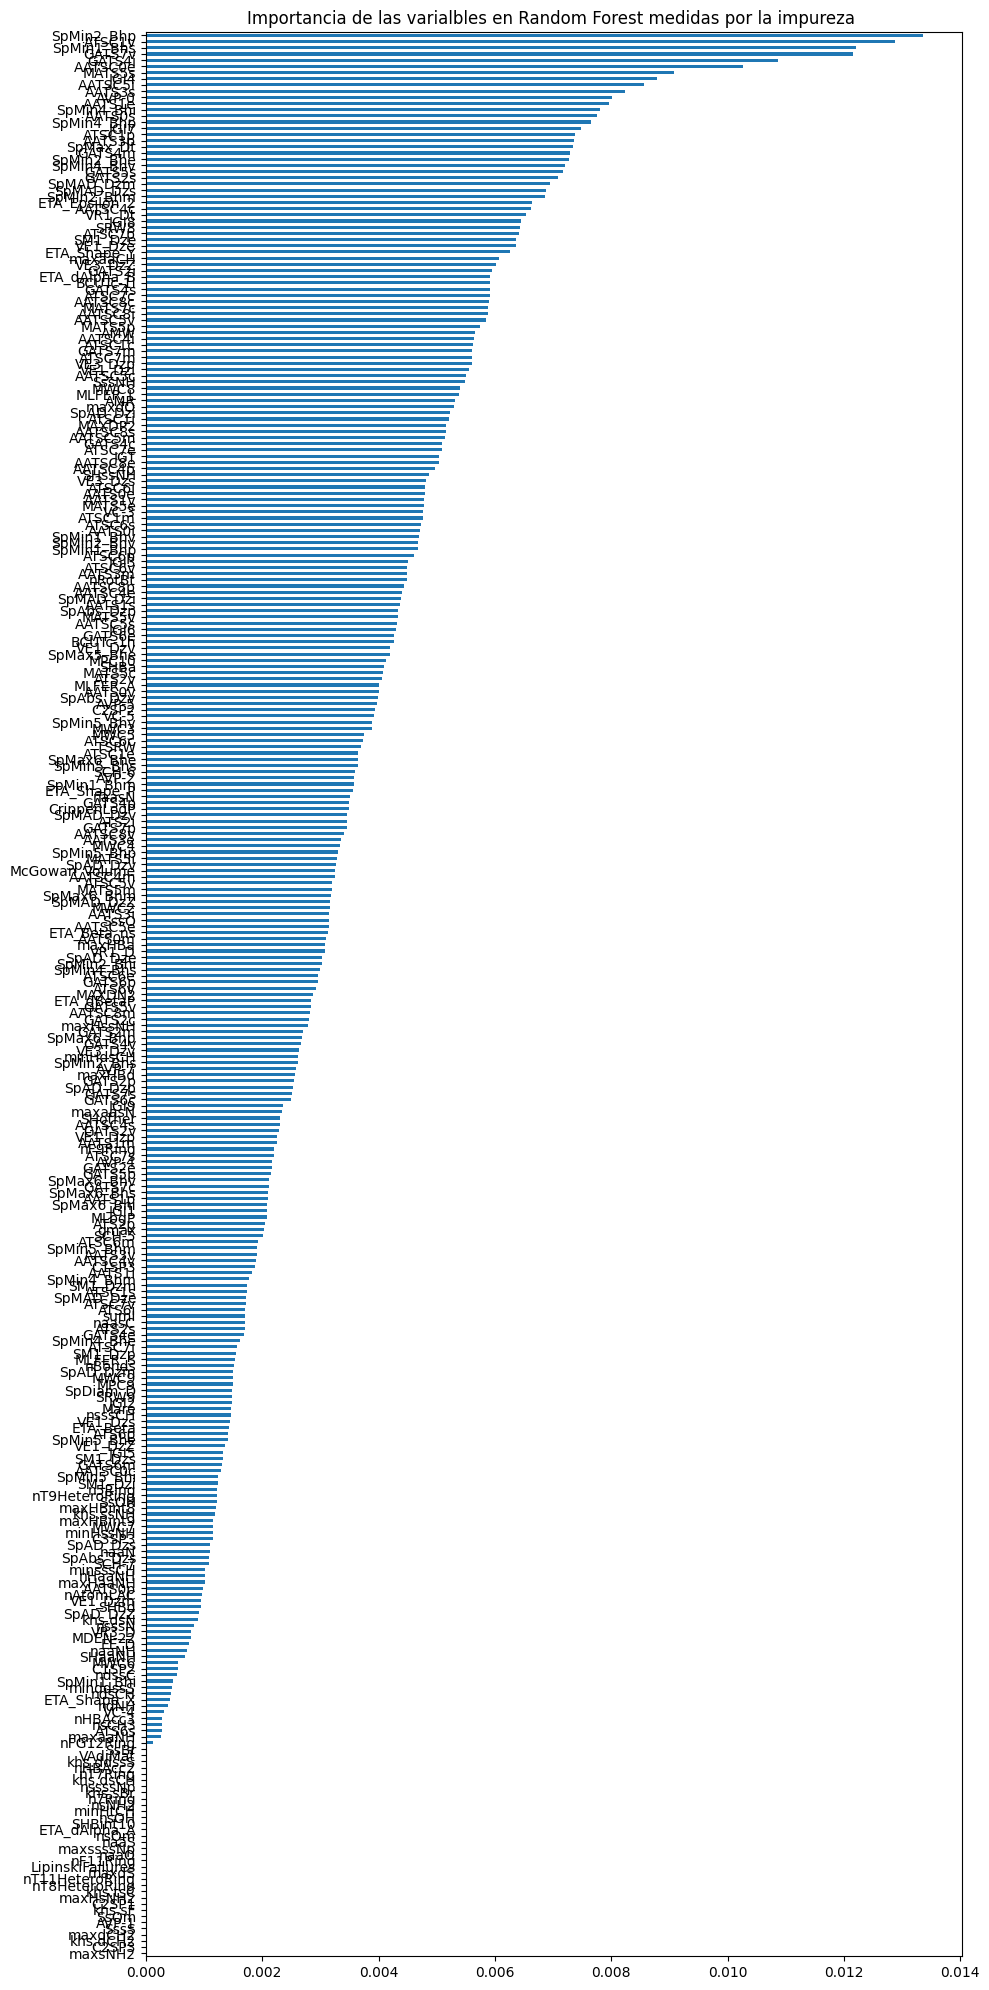

In [86]:
X = tox.iloc[:, :-1] # Todas las columnas menos la última
y = tox.iloc[:, -1] # Sólo la última columna

rf = RandomForestClassifier(random_state=np.random.seed(1234))
rfe = RFE(estimator=rf, n_features_to_select=12)
pipeline = Pipeline(steps=[('s',rfe),('m',rf)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf.fit(X_train, y_train)

mdi_importances = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)
mdi_importances.sort_values(ascending = False, inplace=True)

fig, ax = plt.subplots(figsize=(10, 20))
ax = mdi_importances.sort_values(ascending=True).plot.barh()
ax.set_title("Importancia de las varialbles en Random Forest medidas por la impureza ")
ax.figure.tight_layout()


4. Utiliza ahora la selección de características mediante filtros por la función SelectPercentile utilizando la función de scoring `f_classif` para crear el ranking de características, quedándote con el 10% mejor de características. Utiliza el conjunto de entrenamiento para la selección de las características. Muestra las características seleccionadas.

In [87]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_train, y_train)

caracteristica = selector.get_support()

caracteristicas_seleccionadas = X.columns[caracteristica]

print(f"Características seleccionadas:\n {caracteristicas_seleccionadas}")

Características seleccionadas:
 Index(['ETA_Beta', 'ATSC1p', 'ATSC1v', 'MATS5m', 'AATSC8s', 'AATSC8v',
       'AATSC8c', 'AATSC8e', 'AATSC8i', 'GATS4i', 'ETA_Beta_ns', 'ATSC7e',
       'SpAD_DzZ', 'SpAD_Dzm', 'SpDiam_D', 'C2SP2', 'GATS7c', 'GATS7v',
       'AATSC4v', 'AATSC4i', 'CrippenLogP', 'SHother', 'ATSC5v', 'AATSC4p',
       'AATSC5m', 'VR3_D', 'VR1_Dt', 'MLogP', 'AMR', 'MATS5s', 'VE3_DzZ'],
      dtype='object')


c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [115 146 172 266] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


5. Elige una selección de características. La del apartado 3 o la del apartado 4. Con dicha selección emplea un modelo MLP para clasificar con todos los atributos y sólo con los atributos seleccionados. Obtén 2 métricas para comparar. ¿Qué conclusiones obtienes? ¿Las características seleccionadas son válidas para más de un modelo?

In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

mlp.fit(X_train_selected, y_train)

y_pred_selected = mlp.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

print(f"Características inciales: \n\tAccuracy: {accuracy}\n\tF1: {f1}")
print()
print(f"Características seleccionadas: \n\tAccuracy: {accuracy_selected}\n\tF1: {f1_selected}")

Características inciales: 
	Accuracy: 0.5
	F1: 0.23529411764705882

Características seleccionadas: 
	Accuracy: 0.4423076923076923
	F1: 0.21621621621621623


Los resultados muestran que el modelo con todas las características iniciales tiene un rendimiento ligeramente mejor que el modelo con las características seleccionadas, tanto en términos de precisión (Accuracy) como de puntuación F1.

Por este motivo parece que el modelo con todas las características tiene un rendimiento ligeramente mejor que el modelo con las características seleccionadas.